#Latihan Praktikum
**Nama:** Elok Fiola     
**NIM:** 122450051    
**Kelas:** RC

## D1  PCA Menggunakan Numpy

In [ ]:
#Import pustaka
import numpy as np

In [ ]:
#Import dataset
data = np.array([
    [2.5, 2.4, 3.5, 3.6],
    [0.5, 0.7, 1.2, 1.3],
    [2.2, 2.9, 3.0, 3.4],
    [1.9, 2.2, 2.5, 2.7],
    [3.1, 3.6, 4.1, 4.0],
    [2.3, 2.7, 3.1, 3.0],
    [2.0, 1.6, 2.3, 2.4],
    [1.0, 1.1, 1.5, 1.6],
    [1.5, 1.6, 2.0, 2.1],
    [1.1, 0.9, 1.3, 1.4]
])

In [ ]:
#Lakukan standarisasi
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0) #axis  0 untuk menghitung rata rata per kolom, kalau baris axis = 1
Z = (data - mean) / std_dev
print(Z)

[[ 0.92627881  0.47833912  1.13455516  1.16201358]
 [-1.7585873  -1.41276904 -1.35066091 -1.3833495 ]
 [ 0.52354889  1.0345474   0.5942908   0.94067766]
 [ 0.12081898  0.25585581  0.05402644  0.16600194]
 [ 1.73173864  1.813239    1.78287239  1.60468542]
 [ 0.6577922   0.81206409  0.70234367  0.49800582]
 [ 0.25506228 -0.41159413 -0.16207931 -0.16600194]
 [-1.08737078 -0.96780241 -1.02650229 -1.05134562]
 [-0.41615425 -0.41159413 -0.48623793 -0.49800582]
 [-0.95312747 -1.19028572 -1.24260803 -1.27268154]]


Output menunjukkan nilai-nilai yang telah distandarisasi, yang sekarang memiliki distribusi dengan rata-rata mendekati 0 dan standar deviasi sekitar 1. Contohnya:     
- Baris pertama [ 0.92627881 0.47833912 1.13455516 1.16201358] menunjukkan bahwa nilai untuk setiap fitur di baris ini berada di atas rata-rata (karena positif) dalam satuan standar deviasi.    
- Baris kedua [-1.7585873 -1.41276904 -1.35066091 -1.3833495] menunjukkan bahwa nilai untuk setiap fitur di baris ini berada di bawah rata-rata (karena negatif) dalam satuan standar deviasi.

In [ ]:
#Hitunng matriks kovarians dari Z
cov_matrix = np.cov(Z, rowvar = False)
print(cov_matrix)

[[1.11111111 1.04749839 1.08387384 1.07213923]
 [1.04749839 1.11111111 1.06911049 1.07173112]
 [1.08387384 1.06911049 1.11111111 1.09947084]
 [1.07213923 1.07173112 1.09947084 1.11111111]]


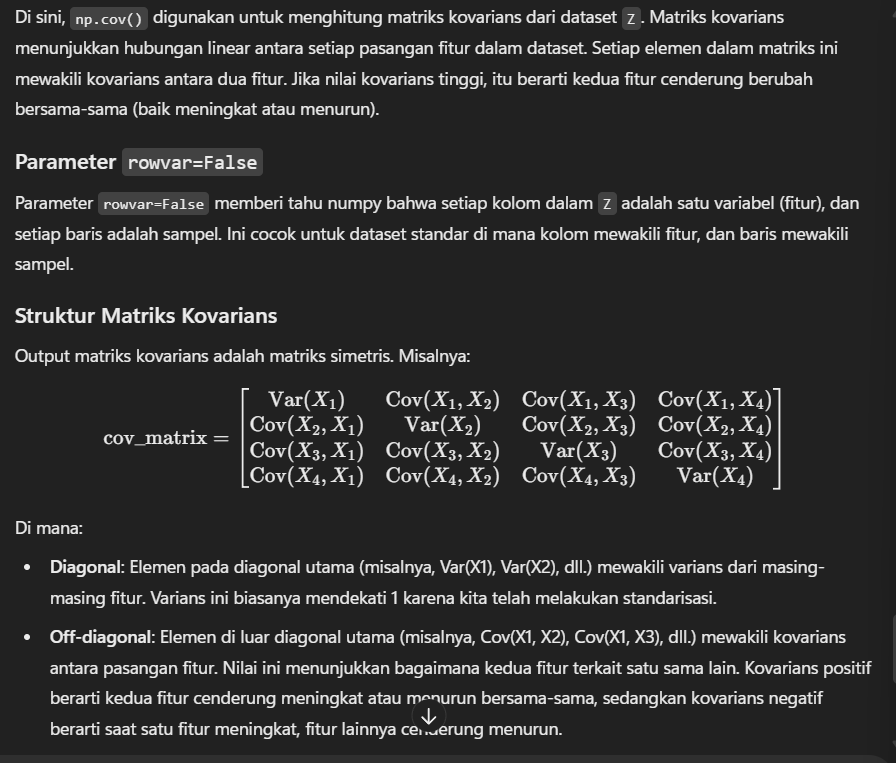

In [ ]:
#Hitung nilai eigen dan vektor eigen dari matriks kovarian cov_matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) #np.linalg.eig untuk menghitung nilai dan vektor eigen
print("Eigenvalues:") #nilai eigen menggambarkan "kekuatan" atau "pentingnya" dari setiap komponen utama.
print(eigenvalues)
print("Eigenvectors:") #untuk menentukan komponen utama, yaitu arah utama di mana data memiliki variasi terbesar.
print(eigenvectors)

#Alasan harus memilih nilai eigen yg tinggi > variansi besar
#varians yang tinggi biasanya mengandung informasi yang lebih penting dibandingkan varians yang rendah, yang sering kali dianggap sebagai noise atau variasi kecil yang tidak penting.

Eigenvalues:
[4.33318943 0.06538576 0.0358081  0.01006116]
Eigenvectors:
[[-0.4978607  -0.60891055 -0.59069863  0.18010494]
 [-0.49607153  0.77557842 -0.38947111 -0.02652168]
 [-0.50354004 -0.16639394  0.36220899 -0.76652797]
 [-0.50248899  0.00437079  0.60678829  0.61586824]]


In [ ]:
#Hitung proporsi variansi dari nilai eigen
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
print("Explained Variance Ratio:")
print(explained_variance_ratio)

Explained Variance Ratio:
[0.97496762 0.0147118  0.00805682 0.00226376]


In [ ]:
#Hitung kontribusi variansi dari nilai eigen
cumulative_variance = np.cumsum(explained_variance_ratio)

#Tampilakn hasil
print("NIali Eigen:", eigenvalues)
print("Proporsi Variasi dari setiap komponen:", explained_variance_ratio)
print("Kontribusi Variasi Kumulatif:", cumulative_variance)

NIali Eigen: [4.33318943 0.06538576 0.0358081  0.01006116]
Proporsi Variasi dari setiap komponen: [0.97496762 0.0147118  0.00805682 0.00226376]
Kontribusi Variasi Kumulatif: [0.97496762 0.98967942 0.99773624 1.        ]


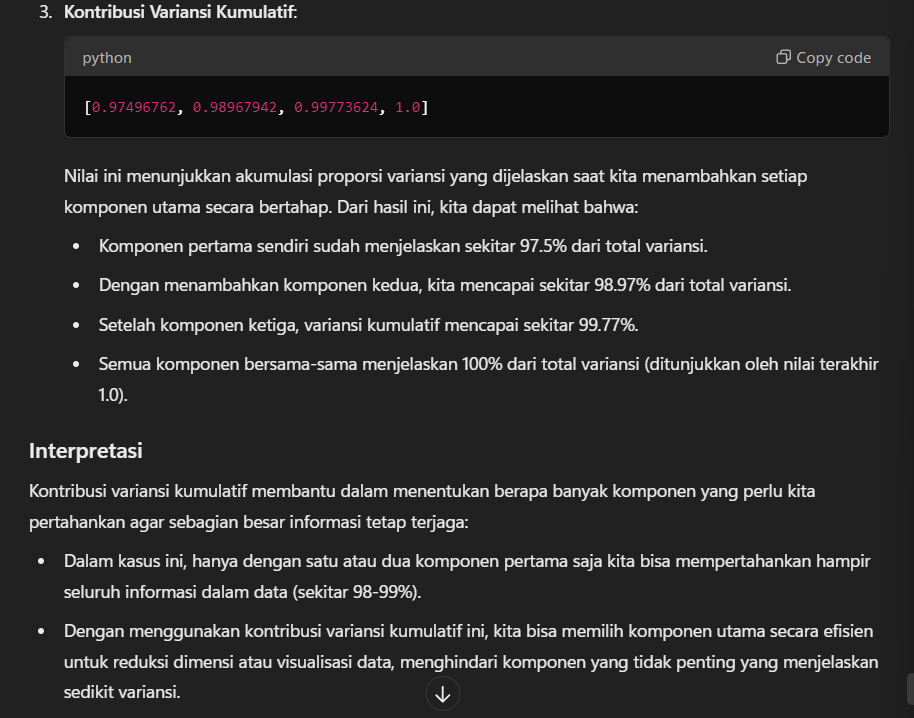

In [ ]:
#Tentukan ambang batas atau threshold dalam pemilihan nilai eigen
#biasanya di atas 70%
threshold = 0.90 #menjelaskan setidaknya 90% dari total variansi dalam data
n_components = np.argmax(cumulative_variance >= threshold)+ 1
print(n_components) #menampilkan jumlah komponen

1


Hasil n_components menunjukkan bahwa 1 komponen utama cukup untuk mencapai ambang batas 90% dari total variansi. Ini berarti komponen pertama sudah cukup untuk menjelaskan sebagian besar informasi dalam data, yang sangat efisien untuk analisis lebih lanjut.   

hanya membutuhkan satu komponen utama untuk mempertahankan 90% variansi, yang sangat efisien untuk reduksi dimensi atau untuk membuat model yang lebih sederhana dan lebih cepat.

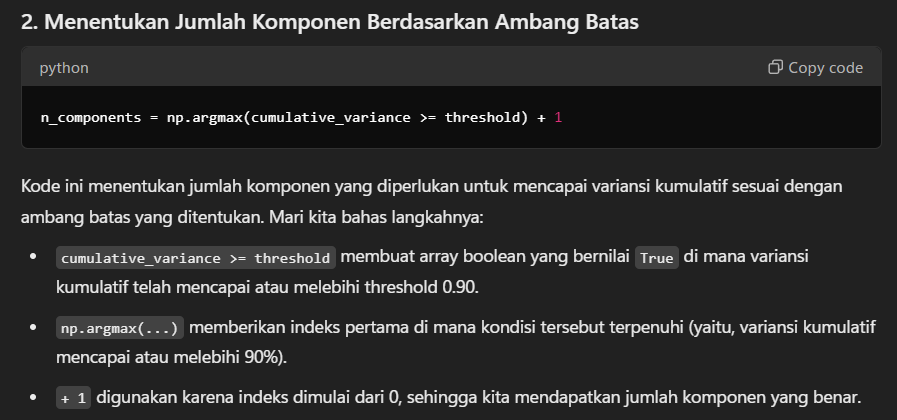

In [ ]:
#Urutkan nilai dan vektor eigen
sorted_indices = np.argsort(eigenvalues)[::-1] #urutkan dari besar ke kecil
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

#tampilkan urutan nilai dan vektor eigen
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)
print("Sorted Eigenvectors:")
print(sorted_eigenvectors)

Sorted Eigenvalues:
[4.33318943 0.06538576 0.0358081  0.01006116]
Sorted Eigenvectors:
[[-0.4978607  -0.60891055 -0.59069863  0.18010494]
 [-0.49607153  0.77557842 -0.38947111 -0.02652168]
 [-0.50354004 -0.16639394  0.36220899 -0.76652797]
 [-0.50248899  0.00437079  0.60678829  0.61586824]]


In [ ]:
#Ambil komponen sesuai n_components sebelumnya.
n_components = 1
W = sorted_eigenvectors[:, :n_components]
print(W) #Vektor ini berfungsi sebagai "basis baru" untuk data, yang memiliki arah variansi terbesar dalam dataset.

[[-0.4978607 ]
 [-0.49607153]
 [-0.50354004]
 [-0.50248899]]


In [ ]:
# Lakukan transformasi data
Y = Z @ W # operatoe @ untuk perkalian matriks

# Z adalah data standar
# W adalah matriks yg berisi vektor eigen

In [ ]:
#Tampilkan hasil reduksi data PCA
print(Y)

[[-1.85364122]
 [ 2.95159575]
 [-1.54579331]
 [-0.29769242]
 [-3.46574526]
 [-1.33423136]
 [ 0.24222221]
 [ 2.066633  ]
 [ 0.90644968]
 [ 2.33020293]]


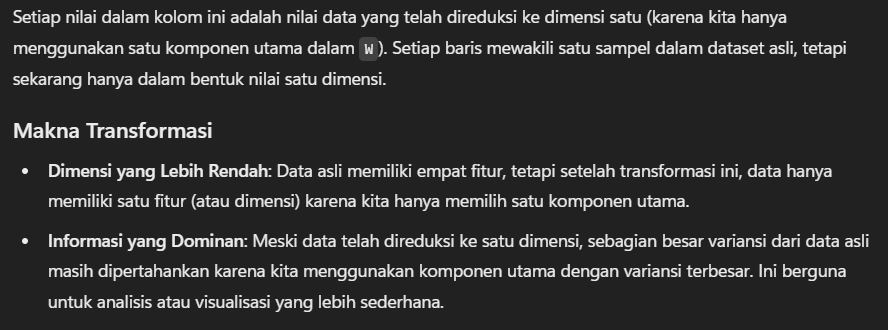

## D.2 PCA Menggunakan Sklearn

In [ ]:
#Import pustaka
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Import dataset
X = np.array([
    [2.5, 2.4, 3.5, 3.6],
    [0.5, 0.7, 1.2, 1.3],
    [2.2, 2.9, 3.0, 3.4],
    [1.9, 2.2, 2.5, 2.7],
    [3.1, 3.6, 4.1, 4.0],
    [2.3, 2.7, 3.1, 3.0],
    [2.0, 1.6, 2.3, 2.4],
    [1.0, 1.1, 1.5, 1.6],
    [1.5, 1.6, 2.0, 2.1],
    [1.1, 0.9, 1.3, 1.4]
])

In [ ]:
# standarisasi data menggunakan StandardScaler dari library sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled).head()

[[ 0.92627881  0.47833912  1.13455516  1.16201358]
 [-1.7585873  -1.41276904 -1.35066091 -1.3833495 ]
 [ 0.52354889  1.0345474   0.5942908   0.94067766]
 [ 0.12081898  0.25585581  0.05402644  0.16600194]
 [ 1.73173864  1.813239    1.78287239  1.60468542]
 [ 0.6577922   0.81206409  0.70234367  0.49800582]
 [ 0.25506228 -0.41159413 -0.16207931 -0.16600194]
 [-1.08737078 -0.96780241 -1.02650229 -1.05134562]
 [-0.41615425 -0.41159413 -0.48623793 -0.49800582]
 [-0.95312747 -1.19028572 -1.24260803 -1.27268154]]


In [ ]:
# standarisasi data menggunakan MinMaxScaler dari library sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.76923077 0.5862069  0.79310345 0.85185185]
 [0.         0.         0.         0.        ]
 [0.65384615 0.75862069 0.62068966 0.77777778]
 [0.53846154 0.51724138 0.44827586 0.51851852]
 [1.         1.         1.         1.        ]
 [0.69230769 0.68965517 0.65517241 0.62962963]
 [0.57692308 0.31034483 0.37931034 0.40740741]
 [0.19230769 0.13793103 0.10344828 0.11111111]
 [0.38461538 0.31034483 0.27586207 0.2962963 ]
 [0.23076923 0.06896552 0.03448276 0.03703704]]


In [ ]:
#Lakukan reduksi dimensi menggunakan PCA dari library sklearn
#DIpilih satu komponen sesuai n_components pada bg.1
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
#Tampilkan hasil reduksi PCA menggunakan sklearn
print("Data setelah PCA:")
print(X_pca)

Data setelah PCA:
[[ 0.58827252]
 [-0.91411215]
 [ 0.49218825]
 [ 0.09338704]
 [ 1.08216924]
 [ 0.41388234]
 [-0.08583289]
 [-0.64615459]
 [-0.28606057]
 [-0.73773919]]
